<a href="https://colab.research.google.com/github/MarshallW11/MLProject/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
features = pd.read_csv('/content/drive/MyDrive/project_files/Features data set.csv')
sales = pd.read_csv('/content/drive/MyDrive/project_files/sales data-set.csv')
stores = pd.read_csv('/content/drive/MyDrive/project_files/stores data-set.csv')

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,5/2/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/2/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,5/3/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [6]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [7]:
features = features.drop(['IsHoliday'], axis=1)

combined = sales.merge(features, on=['Store', 'Date'])
combined = combined.merge(stores, on=['Store'])

combined.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
1,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
2,1,1,19/03/2010,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,A,151315
3,1,1,26/03/2010,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,A,151315
4,1,1,16/04/2010,17596.96,False,66.32,2.808,NaN,NaN,NaN,NaN,NaN,210.488700,7.808,A,151315


In [8]:
sales_combinedDept = sales.groupby(['Store', 'Date'], as_index=False).agg({'Weekly_Sales': 'sum'})

sales_combinedDept['Date'] = pd.to_datetime(sales_combinedDept['Date'], dayfirst=True)
sales_combinedDept = sales_combinedDept.sort_values(by = 'Date')
sales_combinedDept.head()

,Store,Date,Weekly_Sales
5310,38,2010-02-05,358496.14
1735,13,2010-02-05,1967220.53
5882,42,2010-02-05,543384.01
3451,25,2010-02-05,677231.63
4166,30,2010-02-05,465108.52


In [9]:
output_dir = '/content/drive/MyDrive/project_files/SalesOverTime'
os.makedirs(output_dir, exist_ok=True)


for store_id in sales_combinedDept['Store'].unique():
    store_data = sales_combinedDept[sales_combinedDept['Store'] == store_id]

    plt.figure(figsize=(10, 6))
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store_id}', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.title(f'Weekly Sales for Store {store_id}')
    plt.legend()

    filename = os.path.join(output_dir, f'Store_{store_id}_sales.png')
    plt.savefig(filename)
    plt.close()

print(f"Plots saved in folder: {output_dir}")

Plots saved in folder: /content/drive/MyDrive/project_files/SalesOverTime


In [10]:
output_dir = 's/content/drive/MyDrive/project_files/StoreSalesPlots'
os.makedirs(output_dir, exist_ok=True)

x = 5

store_ids = sales_combinedDept['Store'].unique()
store_chunks = np.array_split(store_ids, len(store_ids) // x + (len(store_ids) % x > 0))

for i, store_chunk in enumerate(store_chunks):
    plt.figure(figsize=(10, 6))

    for store_id in store_chunk:
        store_data = sales_combinedDept[sales_combinedDept['Store'] == store_id]

        plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store_id}')

    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.title(f'Weekly Sales for Stores {store_chunk.tolist()}')
    plt.legend()

    filename = os.path.join(output_dir, f'Stores_{i + 1}_batch_sales.png')
    plt.savefig(filename)
    plt.close()

print(f"Plots saved in folder: {output_dir}")

Plots saved in folder: s/content/drive/MyDrive/project_files/StoreSalesPlots


In [11]:
combined['Date'] = pd.to_datetime(combined['Date'], dayfirst=True)
combined['Year'] = combined['Date'].dt.year
combined['Month'] = combined['Date'].dt.month
combined['WeekOfYear'] = combined['Date'].dt.isocalendar().week
combined['DayOfWeek'] = combined['Date'].dt.dayofweek
combined.sort_values(by='Date', inplace=True)
combined.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,WeekOfYear,DayOfWeek
0,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2,7,4
197008,32,93,2010-02-19,27182.43,False,29.16,2.550,NaN,NaN,NaN,NaN,NaN,189.534100,9.014,A,203007,2010,2,7,4
28292,5,41,2010-02-19,333.00,False,41.14,2.514,NaN,NaN,NaN,NaN,NaN,211.847128,6.566,B,34875,2010,2,7,4
197098,32,94,2010-02-19,50281.44,False,29.16,2.550,NaN,NaN,NaN,NaN,NaN,189.534100,9.014,A,203007,2010,2,7,4
197188,32,95,2010-02-19,73601.45,False,29.16,2.550,NaN,NaN,NaN,NaN,NaN,189.534100,9.014,A,203007,2010,2,7,4


In [12]:
#Not sure if these fields are needed, we can play around with these calculations, see if they help, but I think the ones below, with the weighted values, are what we should focuse on

# store_sales = combined.groupby('Store').agg({
   # 'Weekly_Sales': ['mean', 'max', 'std']
#}).reset_index()
#store_sales.columns = ['Store', 'Avg_Weekly_Sales', 'Max_Weekly_Sales', 'Sales_Volatility']
#combined = combined.merge(store_sales, on='Store')
#combined.head()

In [13]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)

# Initialize a Holiday_Weight column with a default value of 1
#Initialize a holiday column with default value of 'Not Holiday Week'
combined['Holiday_Weight'] = 1
combined['Holiday'] = 'Not Holiday Week'

# Define holiday weeks and set weight to 5 for each
# Assuming Super Bowl is the first Sunday in February, adjust as necessary
super_bowl_week = (combined['Date'].dt.month == 2) & (combined['Date'].dt.isocalendar().week <= 6) & (combined['Date'].dt.dayofweek == 6)
labor_day_week = (combined['Date'].dt.month == 9) & (combined['Date'].dt.isocalendar().week == 36)
thanksgiving_week = (combined['Date'].dt.month == 11) & (combined['Date'].dt.isocalendar().week == 47)
christmas_period = (combined['Date'].dt.month == 12) & (combined['Date'].dt.isocalendar().week <= 24)

# Set the holiday weights and names for each holiday period
combined.loc[super_bowl_week, ['Holiday_Weight', 'Holiday']] = [5, 'Super Bowl']
combined.loc[labor_day_week, ['Holiday_Weight', 'Holiday']] = [5, 'Labor Day']
combined.loc[thanksgiving_week, ['Holiday_Weight', 'Holiday']] = [5, 'Thanksgiving']
combined.loc[christmas_period, ['Holiday_Weight', 'Holiday']] = [5, 'Christmas']

# Weighted Weekly Sales
combined['Weighted_Weekly_Sales'] = combined['Weekly_Sales'] * combined['Holiday_Weight']

# Calculates the weighted average sales by store, taking holiday weights into account
weighted_sales = combined.groupby('Store', group_keys=False).apply(
    lambda x: np.average(x['Weekly_Sales'], weights=x['Holiday_Weight']),
    include_groups=False #Exclude grouping columns from the operation
).reset_index(name='Weighted_Avg_Weekly_Sales')
weighted_sales.columns = ['Store', 'Weighted_Avg_Weekly_Sales']

# Merge back to add weighted sales metric to the original DataFrame if needed
# Check if 'Weighted_Avg_Weekly_Sales' already exists, and drop it if it does
if 'Weighted_Avg_Weekly_Sales' in combined.columns:
    combined = combined.drop(columns=['Weighted_Avg_Weekly_Sales'])  # Drop the existing column
#If Weighted_Avg_Weekly_Sales_original' already exists from a previous merge, drop it
if 'Weighted_Avg_Weekly_Sales_original' in combined.columns:
    combined = combined.drop(columns=['Weighted_Avg_Weekly_Sales_original'])

# Merge back to add weighted sales metric to the original DataFrame if needed
combined = combined.merge(weighted_sales, on='Store', how='left')
combined.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,WeekOfYear,DayOfWeek,Holiday_Weight,Holiday,Weighted_Weekly_Sales,Weighted_Avg_Weekly_Sales
0,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2,7,4,1,Not Holiday Week,41595.55,21851.641075
1,32,93,2010-02-19,27182.43,False,29.16,2.550,NaN,NaN,NaN,NaN,NaN,189.534100,9.014,A,203007,2010,2,7,4,1,Not Holiday Week,27182.43,17057.784618
2,5,41,2010-02-19,333.00,False,41.14,2.514,NaN,NaN,NaN,NaN,NaN,211.847128,6.566,B,34875,2010,2,7,4,1,Not Holiday Week,333.00,5203.132258
3,32,94,2010-02-19,50281.44,False,29.16,2.550,NaN,NaN,NaN,NaN,NaN,189.534100,9.014,A,203007,2010,2,7,4,1,Not Holiday Week,50281.44,17057.784618
4,32,95,2010-02-19,73601.45,False,29.16,2.550,NaN,NaN,NaN,NaN,NaN,189.534100,9.014,A,203007,2010,2,7,4,1,Not Holiday Week,73601.45,17057.784618


In [14]:
#Fill misssing and NaN markdown values with 0
combined[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = combined[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].replace("", np.nan)

combined[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = combined[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

missing_values_check = combined[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].isnull().sum()

print("Missing values after filling:")
print(missing_values_check)

Missing values after filling:
MarkDown1    0
MarkDown2    0
MarkDown3    0
MarkDown4    0
MarkDown5    0
dtype: int64


In [15]:
# Select only numeric columns and exclude Weekly_Sales from the correlation analysis
numeric_df = combined.select_dtypes(include=[np.number]).drop(columns=['Weekly_Sales'])

# Compute correlation matrix
correlation = numeric_df.corrwith(combined['Weekly_Sales']).sort_values(ascending=False)

print("Correlation of each feature with Weekly_Sales:")
print(correlation)

Correlation of each feature with Weekly_Sales:
Weighted_Weekly_Sales        0.742902
Weighted_Avg_Weekly_Sales    0.303450
Size                         0.242301
Dept                         0.141525
MarkDown1                    0.054729
MarkDown4                    0.050760
MarkDown3                    0.047114
MarkDown5                    0.045888
Holiday_Weight               0.042176
Month                        0.041101
WeekOfYear                   0.040801
MarkDown2                    0.023941
Fuel_Price                  -0.004727
Temperature                 -0.011153
Year                        -0.015741
CPI                         -0.020417
Unemployment                -0.028259
Store                       -0.084796
DayOfWeek                         NaN
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
scaler = StandardScaler()

#making a copy to preserve the original unscaled df
combined_scaled = combined.copy()

#scaling each of the numerical columns
combined_scaled['Weekly_Sales'] = scaler.fit_transform(combined_scaled[['Weekly_Sales']])
combined_scaled['Temperature'] = scaler.fit_transform(combined_scaled[['Temperature']])
combined_scaled['Fuel_Price'] = scaler.fit_transform(combined_scaled[['Fuel_Price']])
combined_scaled['MarkDown1'] = scaler.fit_transform(combined_scaled[['MarkDown1']])
combined_scaled['MarkDown2'] = scaler.fit_transform(combined_scaled[['MarkDown2']])
combined_scaled['MarkDown3'] = scaler.fit_transform(combined_scaled[['MarkDown3']])
combined_scaled['MarkDown4'] = scaler.fit_transform(combined_scaled[['MarkDown4']])
combined_scaled['MarkDown5'] = scaler.fit_transform(combined_scaled[['MarkDown5']])
combined_scaled['CPI'] = scaler.fit_transform(combined_scaled[['CPI']])
combined_scaled['Unemployment'] = scaler.fit_transform(combined_scaled[['Unemployment']])
combined_scaled['Size'] = scaler.fit_transform(combined_scaled[['Size']])
combined_scaled['Weighted_Weekly_Sales'] = scaler.fit_transform(combined_scaled[['Weighted_Weekly_Sales']])
combined_scaled['Weighted_Avg_Weekly_Sales'] = scaler.fit_transform(combined_scaled[['Weighted_Avg_Weekly_Sales']])
combined_scaled.head()

#performing PCA on the numerical features. Which features we select will likely need tweaking
pca.fit(combined_scaled[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Weighted_Weekly_Sales', 'Weighted_Avg_Weekly_Sales']])
print(pca.explained_variance_ratio_)

[0.20838834 0.15482117 0.10398915 0.10216451 0.09408238 0.07502329
 0.06592213 0.05830604 0.05120168 0.03862887 0.01695945 0.01661308
 0.01389991]


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


# Define features and target variable
X = combined.drop(columns=['Weekly_Sales', 'Date'])
label_encoder = LabelEncoder()


X['Type'] = label_encoder.fit_transform(X['Type'])
X['Holiday'] = label_encoder.fit_transform(X['Holiday'])
y = combined['Weekly_Sales']

# Initialize and fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Calculate feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances from Random Forest:")
print(feature_importances)


Feature Importances from Random Forest:
                      Feature    Importance
20      Weighted_Weekly_Sales  9.494990e-01
19                    Holiday  2.675561e-02
18             Holiday_Weight  2.353129e-02
11               Unemployment  5.752188e-05
3                 Temperature  4.017455e-05
21  Weighted_Avg_Weekly_Sales  3.603410e-05
13                       Size  3.517990e-05
10                        CPI  2.007459e-05
0                       Store  5.194507e-06
12                       Type  4.177803e-06
4                  Fuel_Price  3.402056e-06
5                   MarkDown1  3.173922e-06
7                   MarkDown3  2.142521e-06
8                   MarkDown4  1.833468e-06
14                       Year  1.508285e-06
9                   MarkDown5  1.245306e-06
6                   MarkDown2  1.193249e-06
1                        Dept  1.124256e-06
16                 WeekOfYear  6.484256e-08
15                      Month  1.335487e-08
2                   IsHoliday  7.18

Mean Squared Error: 186436201.10490736
R-squared: 0.636817673878324


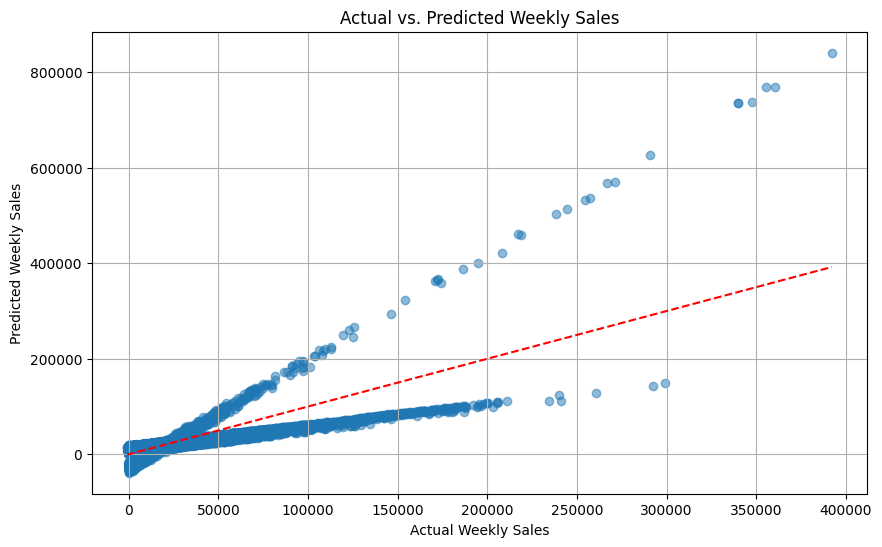

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedGroupKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np


X = combined.drop(columns=['Weekly_Sales', 'Month', 'WeekOfYear', 'Date'])
y = combined['Weekly_Sales']

label_encoder = LabelEncoder()
X['Type'] = label_encoder.fit_transform(X['Type'])
X['Holiday'] = label_encoder.fit_transform(X['Holiday'])
linear_regression_model = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_regression_model.fit(x_train, y_train)
y_pred = linear_regression_model.predict(x_test)

mse =mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs. Predicted Weekly Sales")
plt.grid(True)
plt.show()




Best Parameters: {'regressor__fit_intercept': True, 'regressor__positive': True}
Best Mean Squared Error: 309602793.1961167


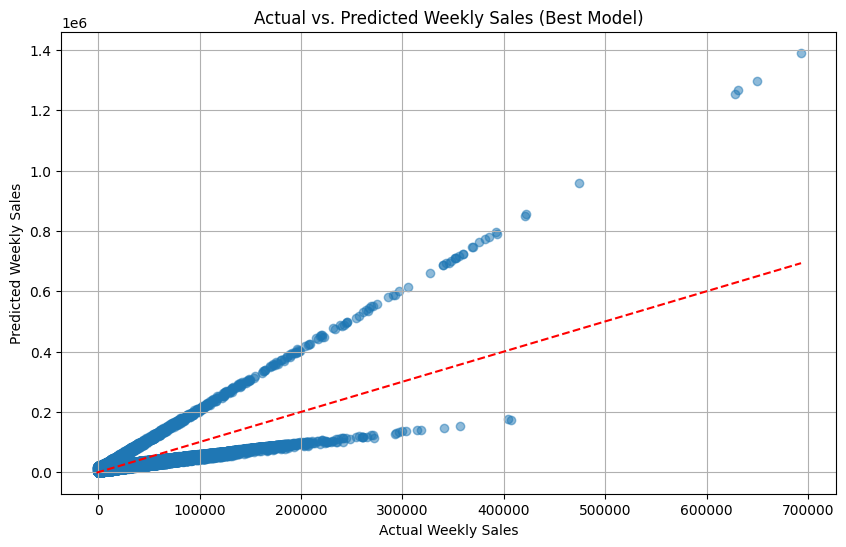

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

## Prepare the data
X = combined.drop(columns=['Weekly_Sales', 'Month', 'WeekOfYear', 'Date'])
y = combined['Weekly_Sales']

# Encode categorical variables
label_encoder = LabelEncoder()
X['Type'] = label_encoder.fit_transform(X['Type'])
X['Holiday'] = label_encoder.fit_transform(X['Holiday'])

# Define the pipeline: first standardize features, then apply linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Define the parameter grid, excluding 'normalize'
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

# Set up GridSearchCV with mean squared error as the scoring metric
model = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring=make_scorer(mean_squared_error, greater_is_better=False)
)

# Fit the grid search model
model.fit(X, y)

# Get the best parameters and score
best_params = model.best_params_
best_score = -model.best_score_  # Flip the sign because we minimized MSE
best_r2 = model.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Mean Squared Error: {best_score}")


# Re-train the best model on the entire dataset for visualization
best_model = model.best_estimator_
y_pred = best_model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line of perfect prediction
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs. Predicted Weekly Sales (Best Model)")
plt.grid(True)
plt.show()


Mean Squared Error (Cross-Validated): 190176406.37965292 ± 19937632.443043962
R-squared (Cross-Validated): 0.6333095812760325 ± 0.026655537972390553


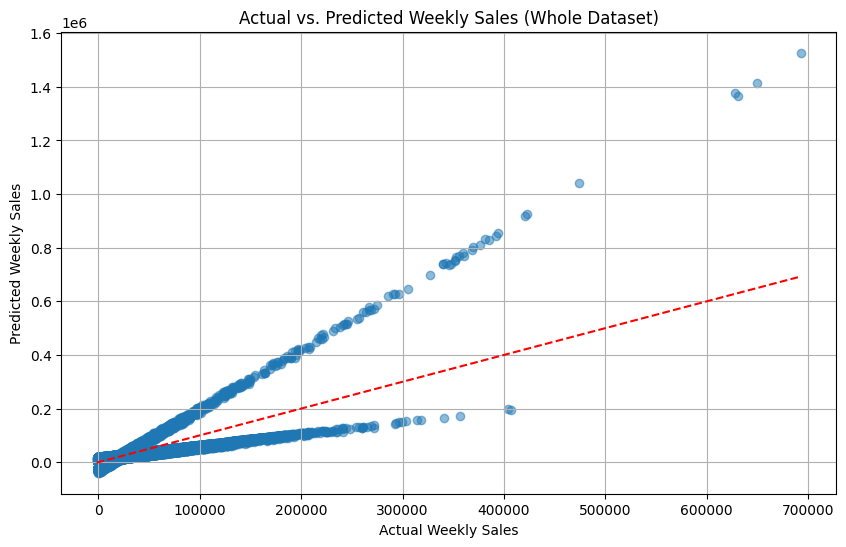

In [20]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
X = combined.drop(columns=['Weekly_Sales', 'Month', 'Date'])
y = combined['Weekly_Sales']

# Encode categorical variables
label_encoder = LabelEncoder()
X['Type'] = label_encoder.fit_transform(X['Type'])
X['Holiday'] = label_encoder.fit_transform(X['Holiday'])

# Initialize the model
linear_regression_model = LinearRegression()

# Define cross-validation settings (5-fold cross-validation)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Use a custom scoring function for mean squared error
mse_scorer = make_scorer(mean_squared_error)

# Perform cross-validation
mse_scores = cross_val_score(linear_regression_model, X, y, cv=kf, scoring=mse_scorer)
r2_scores = cross_val_score(linear_regression_model, X, y, cv=kf, scoring='r2')

# Print results
print(f"Mean Squared Error (Cross-Validated): {np.mean(mse_scores)} ± {np.std(mse_scores)}")
print(f"R-squared (Cross-Validated): {np.mean(r2_scores)} ± {np.std(r2_scores)}")

# Train the model on the entire dataset for visualization
linear_regression_model.fit(X, y)
y_pred = linear_regression_model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line of perfect prediction
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs. Predicted Weekly Sales (Whole Dataset)")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
X = combined.drop(columns=['Weekly_Sales', 'Month', 'Date'])
y = combined['Weekly_Sales']

# Encode categorical variables
label_encoder = LabelEncoder()
X['Type'] = label_encoder.fit_transform(X['Type'])
X['Holiday'] = label_encoder.fit_transform(X['Holiday'])

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV with neg_mean_squared_error as the scoring metric
model = GridSearchCV(
    RandomForestRegressor(random_state=1),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'  # Use negative MSE for regression
)

# Fit the grid search model
model.fit(X, y)

# Get the best parameters and MSE score
best_params = model.best_params_
best_mse = -model.best_score_  # Convert to positive MSE

print(f"Best Parameters: {best_params}")
print(f"Best Mean Squared Error: {best_mse}")

# Re-train best model on the entire dataset for visualization
best_model = model.best_estimator_
y_pred = best_model.predict(X)

# Calculate R-squared for the best model
r2 = best_model.score(X, y)

print(f"R-squared (R^2) on entire dataset: {r2}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line of perfect prediction
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs. Predicted Weekly Sales (Best Model)")
plt.grid(True)
plt.show()